In [19]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# read in data
df = pd.read_excel("../data/FDAcleaned.xlsx")

# visualize the raw data
df.head()

,FEI.Number,firm,product_type,product_classification,status,distribution,state,recall_date,reason,product_description,event_id,event_classification,product_id,center
0,2240869,"Siemens Medical Solutions USA, Inc",Devices,Class I,Ongoing,Worldwide distribution - US Nationwide and the...,Pennsylvania,09/30/2025,There is a potential for an ice blockage to fo...,Biograph mMR. Model Number: 10433372.,97530,Class I,215853,CDRH
1,2240869,"Siemens Medical Solutions USA, Inc",Devices,Class I,Ongoing,Worldwide distribution - US Nationwide and the...,Pennsylvania,09/30/2025,There is a potential for an ice blockage to fo...,BIOGRAPH One (DE). Model Number: 11689172.,97530,Class I,215854,CDRH
2,2240869,"Siemens Medical Solutions USA, Inc",Devices,Class I,Ongoing,Worldwide distribution - US Nationwide and the...,Pennsylvania,09/30/2025,There is a potential for an ice blockage to fo...,MAGNETOM Cima.X (DE). Model Number: 11647158.,97530,Class I,215855,CDRH
3,2240869,"Siemens Medical Solutions USA, Inc",Devices,Class I,Ongoing,Worldwide distribution - US Nationwide and the...,Pennsylvania,09/30/2025,There is a potential for an ice blockage to fo...,MAGNETOM Connectom.X. Model Number: 11371480.,97530,Class I,215856,CDRH
4,2240869,"Siemens Medical Solutions USA, Inc",Devices,Class I,Ongoing,Worldwide distribution - US Nationwide and the...,Pennsylvania,09/30/2025,There is a potential for an ice blockage to fo...,MAGNETOM Lumina (DE). Model Number: 11344916.,97530,Class I,215857,CDRH


Getting the number of unique events (by event ID) for each state

In [15]:
# group by state and count the number of unique event ID's
state_counts = df.groupby('state')['event_id'].nunique()

print(state_counts)

state
Alabama                  295
Alaska                    32
Arizona                  326
Arkansas                  96
California              3072
Colorado                 431
Connecticut              304
Delaware                 107
District of Columbia       4
Florida                 1668
Georgia                  607
Hawaii                    65
Idaho                     69
Illinois                1500
Indiana                  783
Iowa                     321
Kansas                   138
Kentucky                 105
Louisiana                159
Maine                     57
Maryland                 377
Massachusetts           1255
Michigan                 629
Minnesota               1054
Mississippi              119
Missouri                 431
Montana                   47
Nebraska                 103
Nevada                    69
New Hampshire             69
New Jersey              1949
New Mexico                71
New York                1408
North Carolina           567
North Da

In [30]:
# Ensure Date is a datetime column
df['recall_date'] = pd.to_datetime(df['recall_date'])

# Extract year and month
df['Year'] = df['recall_date'].dt.year
df['Month'] = df['recall_date'].dt.month

# Count recalls per month per year
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Recalls')

# Compute average monthly recalls per year
avg_monthly = monthly_counts.groupby('Year')['Recalls'].mean()
print(avg_monthly)


Year
2014    819.000000
2015    658.750000
2016    730.666667
2017    638.583333
2018    647.416667
2019    647.166667
2020    484.750000
2021    406.666667
2022    460.750000
2023    528.750000
2024    486.000000
2025    396.333333
Name: Recalls, dtype: float64


In [31]:
# group by product type and count the number of unique event ID's
product_counts = df.groupby('product_type')['event_id'].nunique()

print(product_counts)

product_type
Biologics         5717
Devices           9805
Drugs             3395
Food/Cosmetics    5954
Tobacco              4
Veterinary         671
Name: event_id, dtype: int64


The next two visualizations will track how the monthly recalls for each product type and class varies over time

Resources for aid in programming:

Pandas .rolling() function
https://www.geeksforgeeks.org/python/python-pandas-dataframe-rolling/

Pandas .to_period() function
https://www.geeksforgeeks.org/pandas/pandas-series-dt-to_period/

Plotting multiple series
https://stackoverflow.com/questions/30942755/plotting-multiple-time-series-after-a-groupby-in-pandas
https://www.geeksforgeeks.org/python/pandas-groupby-multiple-values-and-plotting-results/


product_type,Biologics,Devices,Drugs,Food/Cosmetics,Tobacco,Veterinary
year_month,,,,,,
2014-10,99.0,158.0,227.0,451.0,NaN,164.0
2014-11,62.0,319.0,48.0,139.0,NaN,41.0
2014-12,122.0,415.0,42.0,170.0,NaN,NaN
2015-01,74.0,129.0,53.0,183.0,NaN,11.0
2015-02,56.0,174.0,11.0,424.0,NaN,13.0


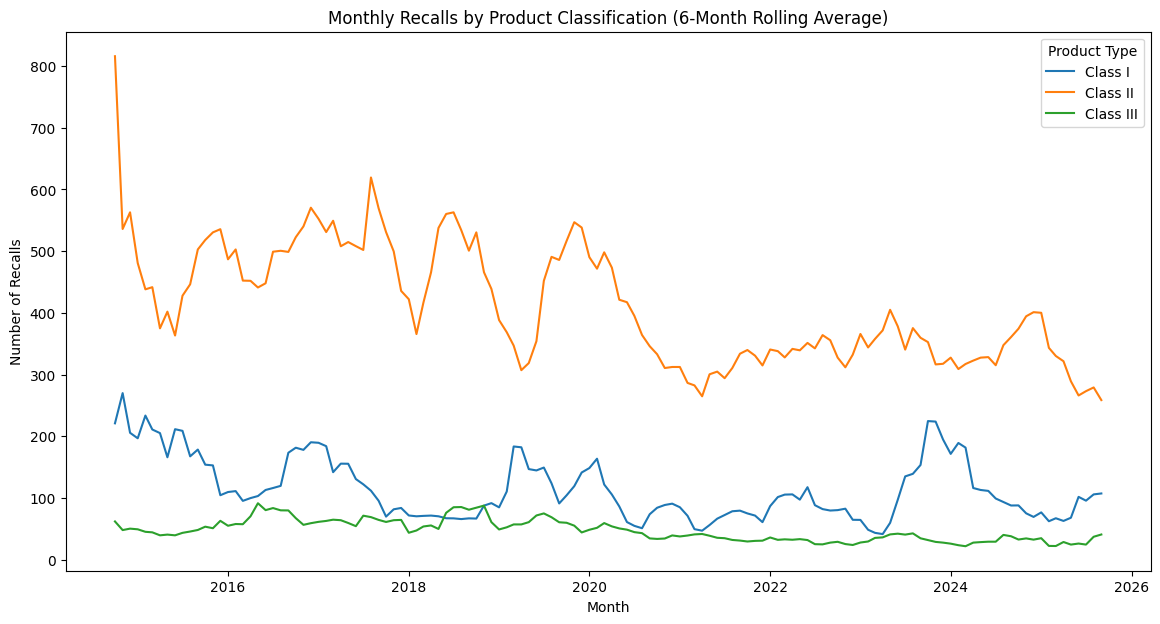